In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from pandas_ml import ConfusionMatrix
%matplotlib inline

##### Reading the training data and its description 

In [2]:
train_df = pd.read_csv('blood_train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
Unnamed: 0                     576 non-null int64
Months since Last Donation     576 non-null int64
Number of Donations            576 non-null int64
Total Volume Donated (c.c.)    576 non-null int64
Months since First Donation    576 non-null int64
Made Donation in March 2007    576 non-null int64
dtypes: int64(6)
memory usage: 27.1 KB


In [335]:
train_df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [3]:
train_df.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [ ]:
#There is an unnamed columns which needs to be named because it is used as identifier

In [ ]:
train_df=train_df.rename(columns = {'Unnamed: 0':'ID'})

### Feature Engineering
Deriving new features

In [338]:

train_df['donation_span'] = train_df['Months since First Donation'] - train_df['Months since Last Donation']

train_df['cc per year'] = train_df['donation_span'] / 12
train_df['cc per year'] = train_df['Total Volume Donated (c.c.)'] / train_df['cc per year']

#remove infinite and fill nulls with Zero 
train_df['cc per year'] = train_df['cc per year'].replace([np.inf, -np.inf], np.nan)
train_df['cc per year'] = train_df['cc per year'].fillna(0)

train_df['Avg #Donation per year'] = train_df['Months since First Donation'] / 12
train_df['Avg #Donation per year'] = train_df['Number of Donations'] / train_df['Avg #Donation per year'] 

#remove infinite and fill nulls with Zero 
train_df['Avg #Donation per year'] = train_df['Avg #Donation per year'].replace([np.inf, -np.inf], np.nan)
train_df['Avg #Donation per year'] = train_df['Avg #Donation per year'].fillna(0)

train_df['donates evry x months'] = train_df['donation_span'] / train_df['Number of Donations']
train_df['first_time'] = train_df['donation_span'].apply(lambda x : 1 if x == 0 else 0)
train_df['donation_span_yr'] = train_df['donation_span'] / 12

### Train dataframe after preprocessing

In [419]:
train_df

,ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007,donation_span,cc per year,Avg #Donation per year,freq per month,donates evry x months,first_time,donation_span_yr
0,619,2,50,12500,98,1,96,1562.500000,6.122449,1.920000,1.920000,0,8.000000
1,664,0,13,3250,28,1,28,1392.857143,5.571429,2.153846,2.153846,0,2.333333
2,441,1,16,4000,35,1,34,1411.764706,5.485714,2.125000,2.125000,0,2.833333
3,160,2,20,5000,45,1,43,1395.348837,5.333333,2.150000,2.150000,0,3.583333
4,358,1,24,6000,77,0,76,947.368421,3.740260,3.166667,3.166667,0,6.333333
5,335,4,4,1000,4,0,0,0.000000,12.000000,0.000000,0.000000,1,0.000000
6,47,2,7,1750,14,1,12,1750.000000,6.000000,1.714286,1.714286,0,1.000000
7,164,1,12,3000,35,0,34,1058.823529,4.114286,2.833333,2.833333,0,2.833333
8,736,5,46,11500,98,1,93,1483.870968,5.632653,2.021739,2.021739,0,7.750000
9,436,0,3,750,4,0,4,2250.000000,9.000000,1.333333,1.333333,0,0.333333


In [420]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 13 columns):
ID                             576 non-null int64
Months since Last Donation     576 non-null int64
Number of Donations            576 non-null int64
Total Volume Donated (c.c.)    576 non-null int64
Months since First Donation    576 non-null int64
Made Donation in March 2007    576 non-null int64
donation_span                  576 non-null int64
cc per year                    576 non-null float64
Avg #Donation per year         576 non-null float64
freq per month                 576 non-null float64
donates evry x months          576 non-null float64
first_time                     576 non-null int64
donation_span_yr               576 non-null float64
dtypes: float64(5), int64(8)
memory usage: 58.6 KB


##### For validation purpose split the training data into 70-30

In [457]:
train,test = train_test_split(train_df,test_size=0.3)
len(train)

403

##### Selecting features and label and storing them into a variable

In [506]:
ftcol = ['donation_span_yr','donates evry x months','Total Volume Donated (c.c.)','Avg #Donation per year','cc per year','Months since Last Donation','Months since First Donation']
features = train[ftcol].values
label = train['Made Donation in March 2007'].values

##### We will use random forest for getting feature importance as well as to validate our features.

In [507]:
rfc = RandomForestClassifier(n_estimators=1500, max_depth=None, min_samples_split=2, random_state=0,verbose=1,n_jobs = 3,warm_start=True)

In [508]:
pred = rfc.fit(features,label).predict(test[ftcol].values)
test['preds'] = pred

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done 1500 out of 1500 | elapsed:    2.0s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 1500 out of 1500 | elapsed:    0.5s finished
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

#### Confusion matrix 

In [509]:
cm = ConfusionMatrix(test['Made Donation in March 2007'],test['preds'])
cm

Predicted    0   1  __all__
Actual                     
0          119  10      129
1           30  14       44
__all__    149  24      173

#### Accuracy and other statistics

In [510]:
cm.print_stats()

population: 173
P: 44
N: 129
PositiveTest: 24
NegativeTest: 149
TP: 14
TN: 119
FP: 10
FN: 30
TPR: 0.318181818182
TNR: 0.922480620155
PPV: 0.583333333333
NPV: 0.798657718121
FPR: 0.077519379845
FDR: 0.416666666667
FNR: 0.681818181818
ACC: 0.768786127168
F1_score: 0.411764705882
MCC: 0.303201084869
informedness: 0.240662438337
markedness: 0.381991051454
prevalence: 0.254335260116
LRP: 4.10454545455
LRN: 0.739113827349
DOR: 5.55333333333
FOR: 0.201342281879


#### Feature importance

,Feature,Value
3,Avg #Donation per year,0.185337
5,Months since Last Donation,0.150958
4,cc per year,0.146816
1,donates evry x months,0.134153
6,Months since First Donation,0.132959
0,donation_span_yr,0.131146
2,Total Volume Donated (c.c.),0.118630


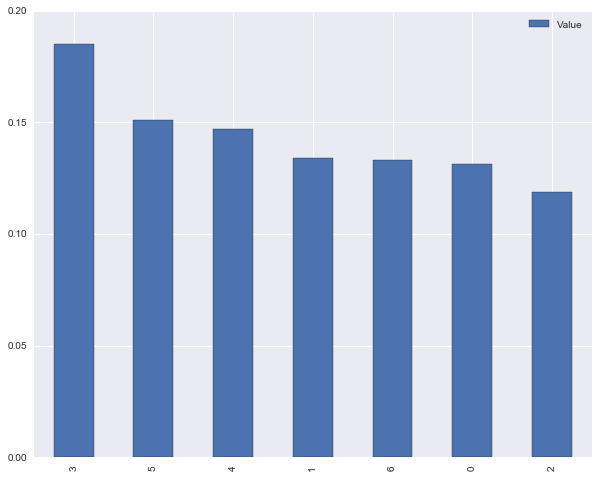

In [511]:
arr = np.column_stack((ftcol,list(rfc.feature_importances_)))
dfplt2 = pd.DataFrame(arr)
dfplt2[1] = dfplt2[1].astype('float')
dfplt2.columns = ['Feature','Value']
dfplt2 = dfplt2.sort_values('Value',ascending=False)
dfplt2.plot(kind='bar',figsize=(10,8))
dfplt2

In [512]:
log_loss(test['Made Donation in March 2007'],test['preds'])

7.9858904726631748

#### Correlation between all the features

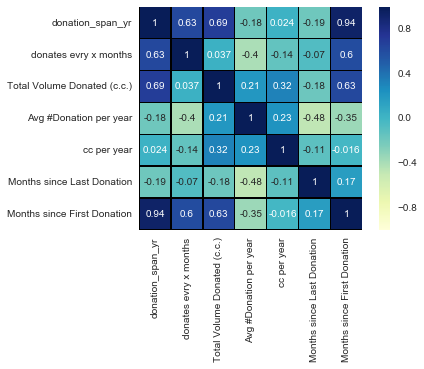

In [513]:
sns.heatmap(train[ftcol].corr(),linewidths=0.25,vmax=1.0, annot =True, square=True, cmap="YlGnBu", linecolor='black')

##### Validation using logistic Regression

In [514]:
from sklearn.linear_model import LogisticRegression

In [518]:
lr = LogisticRegression(max_iter =1000,solver='liblinear',verbose=1)
predlr = lr.fit(features,label).predict(test[ftcol])
test['predlr'] = predlr

[LibLinear]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [519]:
c2 = ConfusionMatrix(test['Made Donation in March 2007'],test['predlr'])
c2

Predicted    0   1  __all__
Actual                     
0          125   4      129
1           38   6       44
__all__    163  10      173

In [520]:
c2.print_stats()

population: 173
P: 44
N: 129
PositiveTest: 10
NegativeTest: 163
TP: 6
TN: 125
FP: 4
FN: 38
TPR: 0.136363636364
TNR: 0.968992248062
PPV: 0.6
NPV: 0.766871165644
FPR: 0.031007751938
FDR: 0.4
FNR: 0.863636363636
ACC: 0.757225433526
F1_score: 0.222222222222
MCC: 0.196601210898
informedness: 0.105355884426
markedness: 0.366871165644
prevalence: 0.254335260116
LRP: 4.39772727273
LRN: 0.891272727273
DOR: 4.93421052632
FOR: 0.233128834356


#### Bring in the Test dataset

In [383]:
test_df = pd.read_csv('blood_test.csv')

In [384]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0                     200 non-null int64
Months since Last Donation     200 non-null int64
Number of Donations            200 non-null int64
Total Volume Donated (c.c.)    200 non-null int64
Months since First Donation    200 non-null int64
dtypes: int64(5)
memory usage: 7.9 KB


#### Same preprocessing for the testing dataset

In [385]:
test_df=test_df.rename(columns = {'Unnamed: 0':'ID'})
test_df['donation_span'] = test_df['Months since First Donation'] - train_df['Months since Last Donation']

test_df['cc per year'] = test_df['donation_span'] / 12
test_df['cc per year'] = test_df['Total Volume Donated (c.c.)'] / test_df['cc per year']
test_df['cc per year'] = test_df['cc per year'].replace([np.inf, -np.inf], np.nan)
test_df['cc per year'] = test_df['cc per year'].fillna(0)
test_df['Avg #Donation per year'] = test_df['Months since First Donation'] / 12
test_df['Avg #Donation per year'] = test_df['Number of Donations'] / test_df['Avg #Donation per year'] 
test_df['Avg #Donation per year'] = test_df['Avg #Donation per year'].replace([np.inf, -np.inf], np.nan)
test_df['Avg #Donation per year'] = test_df['Avg #Donation per year'].fillna(0)
test_df['donates evry x months'] = test_df['donation_span'] / test_df['Number of Donations']
test_df['first_time'] = test_df['donation_span'].apply(lambda x : 1 if x == 0 else 0)

In [386]:
test_df

,ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,donation_span,cc per year,Avg #Donation per year,freq per month
0,659,2,12,3000,52,50.0,720.000000,2.769231,4.166667
1,276,21,7,1750,38,38.0,552.631579,2.210526,5.428571
2,263,4,1,250,4,3.0,1000.000000,3.000000,3.000000
3,303,11,11,2750,38,36.0,916.666667,3.473684,3.272727
4,83,4,12,3000,34,33.0,1090.909091,4.235294,2.750000
5,500,3,21,5250,42,38.0,1657.894737,6.000000,1.809524
6,530,4,2,500,4,2.0,3000.000000,6.000000,1.000000
7,244,14,1,250,14,13.0,230.769231,0.857143,13.000000
8,249,23,2,500,87,82.0,73.170732,0.275862,41.000000
9,728,14,4,1000,64,64.0,187.500000,0.750000,16.000000


In [388]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
ID                             200 non-null int64
Months since Last Donation     200 non-null int64
Number of Donations            200 non-null int64
Total Volume Donated (c.c.)    200 non-null int64
Months since First Donation    200 non-null int64
donation_span                  200 non-null float64
cc per year                    200 non-null float64
Avg #Donation per year         200 non-null float64
freq per month                 200 non-null float64
dtypes: float64(4), int64(5)
memory usage: 14.1 KB


#### Using Logistic regression and random forest regressor for making final regressions

In [389]:
lr = LogisticRegression(max_iter =1000,solver='liblinear',verbose=1)
predlr = lr.fit(train_df[ftcol].values,train_df['Made Donation in March 2007']).predict_proba(test_df[ftcol])

[LibLinear]

In [390]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1500, max_depth=None, min_samples_split=2, random_state=0,verbose=1,n_jobs = 3,warm_start=True)

In [391]:
predreg = rfr.fit(train_df[ftcol].values,train_df['Made Donation in March 2007']).predict(test_df[ftcol])
test_df['predreg'] = predreg

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    1.6s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    2.5s
[Parallel(n_jobs=3)]: Done 1500 out of 1500 | elapsed:    3.0s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done 1500 out of 1500 | elapsed:    1.1s finished


In [392]:
df = pd.DataFrame(predlr)
df.columns = ['LogicPred','LogicPredfinal']

In [393]:
test_df = pd.concat([test_df,df['LogicPredfinal']],axis=1)

In [394]:
test_df.head()

,ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,donation_span,cc per year,Avg #Donation per year,freq per month,predreg,LogicPredfinal
0,659,2,12,3000,52,50.0,720.000000,2.769231,4.166667,0.549702,0.459924
1,276,21,7,1750,38,38.0,552.631579,2.210526,5.428571,0.340119,0.122598
2,263,4,1,250,4,3.0,1000.000000,3.000000,3.000000,0.266099,0.349006
3,303,11,11,2750,38,36.0,916.666667,3.473684,3.272727,0.124200,0.323020
4,83,4,12,3000,34,33.0,1090.909091,4.235294,2.750000,0.601766,0.504241


#### Store final predictions to a CSV file

In [395]:
test_df[['ID','LogicPredfinal']].to_csv('bloodResult17-3.csv',index=False)